<a href="https://colab.research.google.com/github/leesm0409/bootcamp/blob/main/07_(2)%EC%84%A0%ED%98%95_%EB%B6%84%EB%A5%98_%EB%AA%A8%EB%8D%B8_%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1_%ED%9A%8C%EA%B7%80_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mglearn
!pip install koreanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 14.1 MB/s eta 0:00:00


#선형 분류 모델의 결정 경계

In [ ]:
import mglearn
import matplotlib.pyplot as plt
import koreanize_matplotlib

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

import warnings
warnings.filterwarnings('ignore')



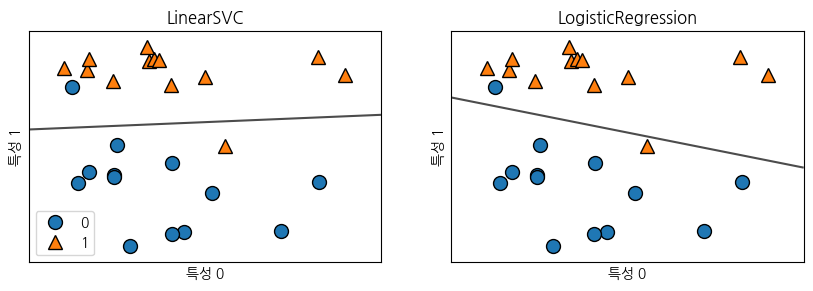

In [ ]:
X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(max_iter=5000), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend()
plt.show()

## LogisticRegression 규제에 따른 결정경계 확인

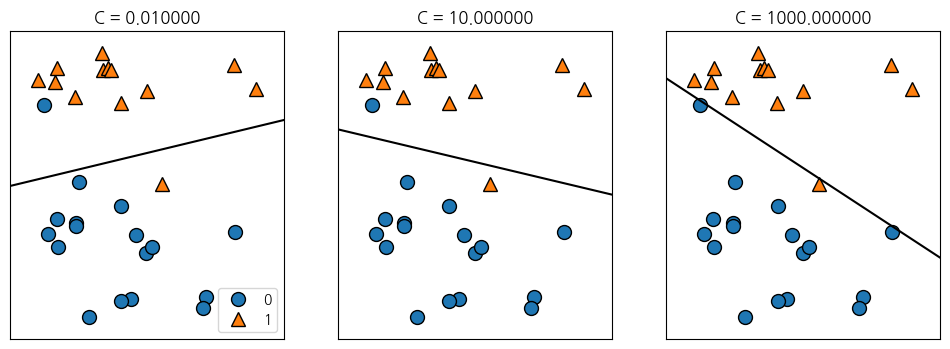

In [ ]:
# C=1 규제(공부를 덜 시키겠다 -> 과대적합을 피하겠다) 설정 값
# C 설정 값이 낮으면 ex) 0.01, 0.001 -> 규제 강화 -> 일반화 -> 과소적합
# C 설정 값이 높으면 ex) 10, 100, 1000 -> 규제 완화 -> 과대적합

mglearn.plots.plot_linear_svc_regularization()

## 유방암 데이터셋을 사용한 로지스틱 회귀 성능평가

*   규제 강도를 결정하는 C 설정에 따른 성능 비교
*   기본 C = 1, 규제 강화 C = 0.01, 규제 완화 C = 100



### 데이터 준비하기


In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# 데이터 가져오기
cancer = load_breast_cancer()

#성능 평가를 위한 데이터셋 분리하기
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    stratify=cancer.target, #비율 교정
                                                    random_state=7) #75:25

In [ ]:
# 569건 -> 75% ->426건
X_train.shape

(426, 30)

In [ ]:
X_test.shape

(143, 30)

### 모델 설정하기

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression() # C =1

### 모델 학습하기

In [ ]:
logreg.fit(X_train, y_train)

LogisticRegression()

### 모델 성능 평가하기

In [ ]:
print('훈련 데이터셋의 R2: ', logreg.score(X_train, y_train))
print('테스트 데이터셋의 R2: ', logreg.score(X_test, y_test))

훈련 데이터셋의 R2:  0.960093896713615
테스트 데이터셋의 R2:  0.9440559440559441


## 기본 C = 1, 규제 강화 C = 0.01, 규제 완화 C = 100

In [ ]:
logreg = LogisticRegression().fit(X_train, y_train)
print('훈련 데이터셋의 R2: ', logreg.score(X_train, y_train))
print('테스트 데이터셋의 R2: ', logreg.score(X_test, y_test))
print('--------------------------------------------------')

# 규제강화
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print('훈련 데이터셋의 R2: ', logreg001.score(X_train, y_train))
print('테스트 데이터셋의 R2: ', logreg001.score(X_test, y_test))
print('--------------------------------------------------')

# 규제완화
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print('훈련 데이터셋의 R2: ', logreg100.score(X_train, y_train))
print('테스트 데이터셋의 R2: ', logreg100.score(X_test, y_test))
print('--------------------------------------------------')

훈련 데이터셋의 R2:  0.960093896713615
테스트 데이터셋의 R2:  0.9440559440559441
--------------------------------------------------
훈련 데이터셋의 R2:  0.9295774647887324
테스트 데이터셋의 R2:  0.9440559440559441
--------------------------------------------------
훈련 데이터셋의 R2:  0.9436619718309859
테스트 데이터셋의 R2:  0.9440559440559441
--------------------------------------------------


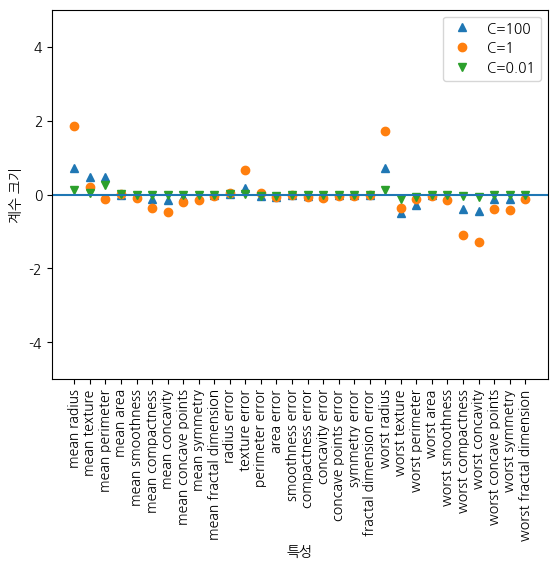

In [ ]:
# L2 규제에 대한 feature들의 가중치를 확인

plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg001.coef_.T, 'v', label="C=0.01")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("특성")
plt.ylabel("계수 크기")
plt.legend()
plt.show()

### L1규제에 따른 성능평가

In [ ]:
logreg = LogisticRegression(penalty='l1', solver='liblinear').fit(X_train, y_train)
print('훈련 데이터셋의 R2: ', logreg.score(X_train, y_train))
print('테스트 데이터셋의 R2: ', logreg.score(X_test, y_test))
print('--------------------------------------------------')

# 규제강화
logreg001 = LogisticRegression(C=0.01,penalty='l1', solver='liblinear').fit(X_train, y_train)
print('훈련 데이터셋의 R2: ', logreg001.score(X_train, y_train))
print('테스트 데이터셋의 R2: ', logreg001.score(X_test, y_test))
print('--------------------------------------------------')

# 규제완화
logreg100 = LogisticRegression(C=100,penalty='l1', solver='liblinear').fit(X_train, y_train)
print('훈련 데이터셋의 R2: ', logreg100.score(X_train, y_train))
print('테스트 데이터셋의 R2: ', logreg100.score(X_test, y_test))
print('--------------------------------------------------')

훈련 데이터셋의 R2:  0.960093896713615
테스트 데이터셋의 R2:  0.9440559440559441
--------------------------------------------------
훈련 데이터셋의 R2:  0.9154929577464789
테스트 데이터셋의 R2:  0.916083916083916
--------------------------------------------------
훈련 데이터셋의 R2:  0.9859154929577465
테스트 데이터셋의 R2:  0.958041958041958
--------------------------------------------------


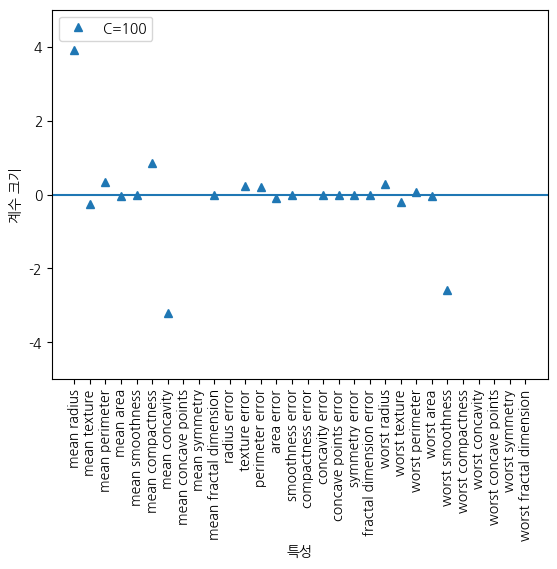

In [ ]:
# L1 규제에 대한 feature selection 확인

plt.plot(logreg100.coef_.T, '^', label="C=100")
#plt.plot(logreg.coef_.T, 'o', label="C=1")
#plt.plot(logreg001.coef_.T, 'v', label="C=0.01")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("특성")
plt.ylabel("계수 크기")
plt.legend()
plt.show()